## Домашнє завдання на тему "Перевірка вибірки на нормальність"

0.Зчитайте дані з `data.csv` та запишіть значення колонки data у форматі np.ndarray в змінну data. Ми будемо далі працювати з цією змінною.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('drive/MyDrive/Data Analysis 7.0/data/data_statistics/data_1.csv')

In [4]:
data_1 = np.array(df['data'])

Запустіть код нижче. Для коректної робити всіх подальших методів дані мають бути у вигляді одновимірного вектора, тобто мати розмір (100,).

In [5]:
data_1.shape

(100,)

## Перевірка вибірки на нормальність

1.**Візуалізація розподілу**

Подивимось спершу на розподіл наших даних. Для цього побудуємо розподіл даних (графік на вигляд як гістограма, тільки він нормований так, аби сума під кривою була рівна 1), а на нього накладемо лінійний графік щільності (PDF - для побудови використовуємо `scipy.stats.norm.pdf(...)`) теоретичного нормального розподілу з середнім та стандартним відхиленням як у наших даних.

Візуалізацію будуємо за аналогією прикладу, що наводився у лекції, коли ми будували кілька кривих щільності для одних і тих самих даних, тільки значно більш спрощено, бо розподіл для порівняння у нас лише один - нормальний.

Побудуйте графік як наведено в очікуваному результаті та напишіть ваш висновок, чи схоже, що дані розподілені нормально?

Підказка: весь графік будується за 6 рядків коду, три з яких - підписи осей і графіку. Аби побудувати лінійний графік функції щільності та він наклався на гістограму, необхідно задати значення іксів з діапазону значень наших даних. Ці значення вже задані для вас, залишилось дописати 5 рядочків коду :)

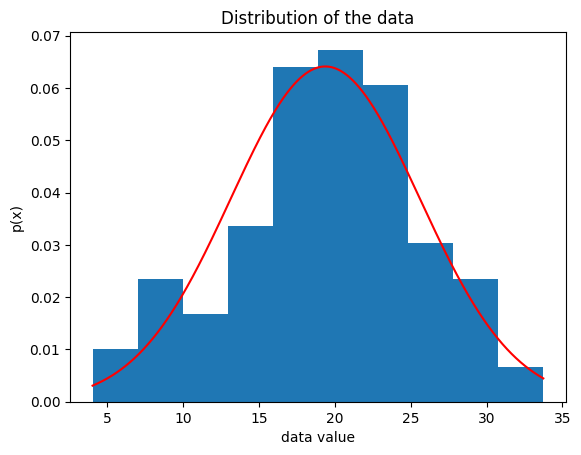

In [6]:
x_axis = np.arange(data_1.min(), data_1.max(), 0.01)
plt.hist(data_1, density=True)
plt.plot(x_axis, st.norm.pdf(x_axis, loc=data_1.mean(), scale=data_1.std()), 'r')
plt.title('Distribution of the data')
plt.xlabel('data value')
plt.ylabel('p(x)');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1SB_HOIgwfZXrtglBBlDfMYjg2eGGBSIX)


Лінія щільності непогано повторює форму і накладається на гістограму, можна стверджувати, що дані мають нормальний розподіл.

2.**QQ графік**

Ще одним візуалізаційним методом перевірки розподілу вибірки даних на нормальність є графік квантиль-квантиль, Q-Q графік або QQ графік. У лекції ми розбирали, що це за графік, та як його інтерпретувати.

Побудуйте QQ-Plot для порівняння з нормальним розподілом наших даних та напишіть висновок з графіку, чи можна сказати, що дані розподілені за нормальним законом?

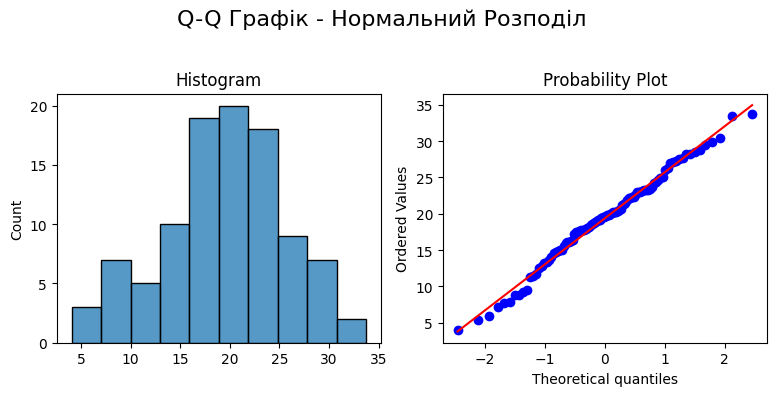

In [7]:
from scipy.stats import probplot
def create_plot(data_1, title):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    fig.suptitle(title, fontsize=16)

    sns.histplot(data_1, ax=axs[0])
    axs[0].set_title('Histogram')

    probplot(data_1, dist="norm", plot=axs[1])
    axs[1].set_title('Probability Plot')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

create_plot(data_1, 'Q-Q Графік - Нормальний Розподіл')

Висновок:
Спостерігаю, що точки відхиляються ближче до хвостів графіка, це може вказувати на більшу дисперсію і наявність важких хвостів у розподілі, на гістограмі це, по суті, видно, тобто можна припускати, що маємо нормальні дані з більшою дисперсією, які мають ширший розподіл.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1-eDd16OVgqEjzFUBjJJzSMcwSrzNNm_V)

3.**Тест Шапіро-Вілка**

Тест Шапіро-Вілка визначає для вибірки, наскільки ймовірно, що вона була витягнута з нормального розподілу.
Нульова гіпотеза H0 тесту Шапіро-Вилка полягає в тому, що випадкова величина, вибірка якої відома, розподілена за нормальним законом. Альтернативна гіпотеза H1 полягає в тому, що закон розподілу **не** є нормальним.

**Задача**: протестувати нашу вибірку на нормальність з допомогою теcта Шапіро-Вілка, реалізованого в функцію [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). Висновок зробіть на основі аналізу p-значення. На рівні значущості = 0.05 чи можемо ми відхилити гіпотезу Н0? Відповідь можна надати текстом, або написати простий if-else блок для виведення висновку спираючись на отримане p-значення. Нагадування:
- p <= alpha: відхиляємо H0.
- p > alpha: не можемо відхилити H0.

Також пропоную вам переглянути оце [відео](https://youtu.be/eh9eYLBecWk), тут розказується про QQ графік, тест Шапіро, та звʼязок між ними.


In [8]:
from scipy.stats import shapiro, normaltest
alpha = 0.05
stat, p_value_shapiro = shapiro(data_1)
print("Тест Шапіро-Вілка:")
print("Статистика тесту:", stat)
print("P-значення:", p_value_shapiro)

Тест Шапіро-Вілка:
Статистика тесту: 0.9887855685963715
P-значення: 0.5677973106978921


In [9]:
# Висновок
if p_value_shapiro > alpha:
    print("\nЗа результатами тесту Шапіро-Вілка дані мають нормальний розподіл (не можемо відхилити H0).")
else:
    print("\nЗа результатами тесту Шапіро-Вілка дані не мають нормального розподілу (відхиляємо H0).")


За результатами тесту Шапіро-Вілка дані мають нормальний розподіл (не можемо відхилити H0).
